In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
fd_data=pd.read_csv("Fraud_check.csv")
fd_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [21]:
fd_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [22]:
fd_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_encoder=LabelEncoder()
fd_data['Undergrad']=le_encoder.fit_transform(fd_data['Undergrad'])
fd_data['Urban']=le_encoder.fit_transform(fd_data['Urban'])
fd_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [7]:
fd_data=pd.get_dummies(fd_data,columns=['Marital.Status'],drop_first=True)
fd_data

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0
...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,0,0
596,1,69967,55369,2,1,0,0
597,0,47334,154058,0,1,0,0
598,1,98592,180083,17,0,1,0


In [8]:
fd_data=fd_data.assign(taxgrp=pd.cut(fd_data['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good']))
fd_data

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,taxgrp
0,0,68833,50047,10,1,0,1,Good
1,1,33700,134075,18,1,0,0,Good
2,0,36925,160205,30,1,1,0,Good
3,1,50190,193264,15,1,0,1,Good
4,0,81002,27533,28,0,1,0,Good
...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,0,0,Good
596,1,69967,55369,2,1,0,0,Good
597,0,47334,154058,0,1,0,0,Good
598,1,98592,180083,17,0,1,0,Good


In [9]:
fd_data=pd.get_dummies(fd_data,columns=['taxgrp'],drop_first=True)
fd_data

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,taxgrp_Good
0,0,68833,50047,10,1,0,1,1
1,1,33700,134075,18,1,0,0,1
2,0,36925,160205,30,1,1,0,1
3,1,50190,193264,15,1,0,1,1
4,0,81002,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,0,0,1
596,1,69967,55369,2,1,0,0,1
597,0,47334,154058,0,1,0,0,1
598,1,98592,180083,17,0,1,0,1


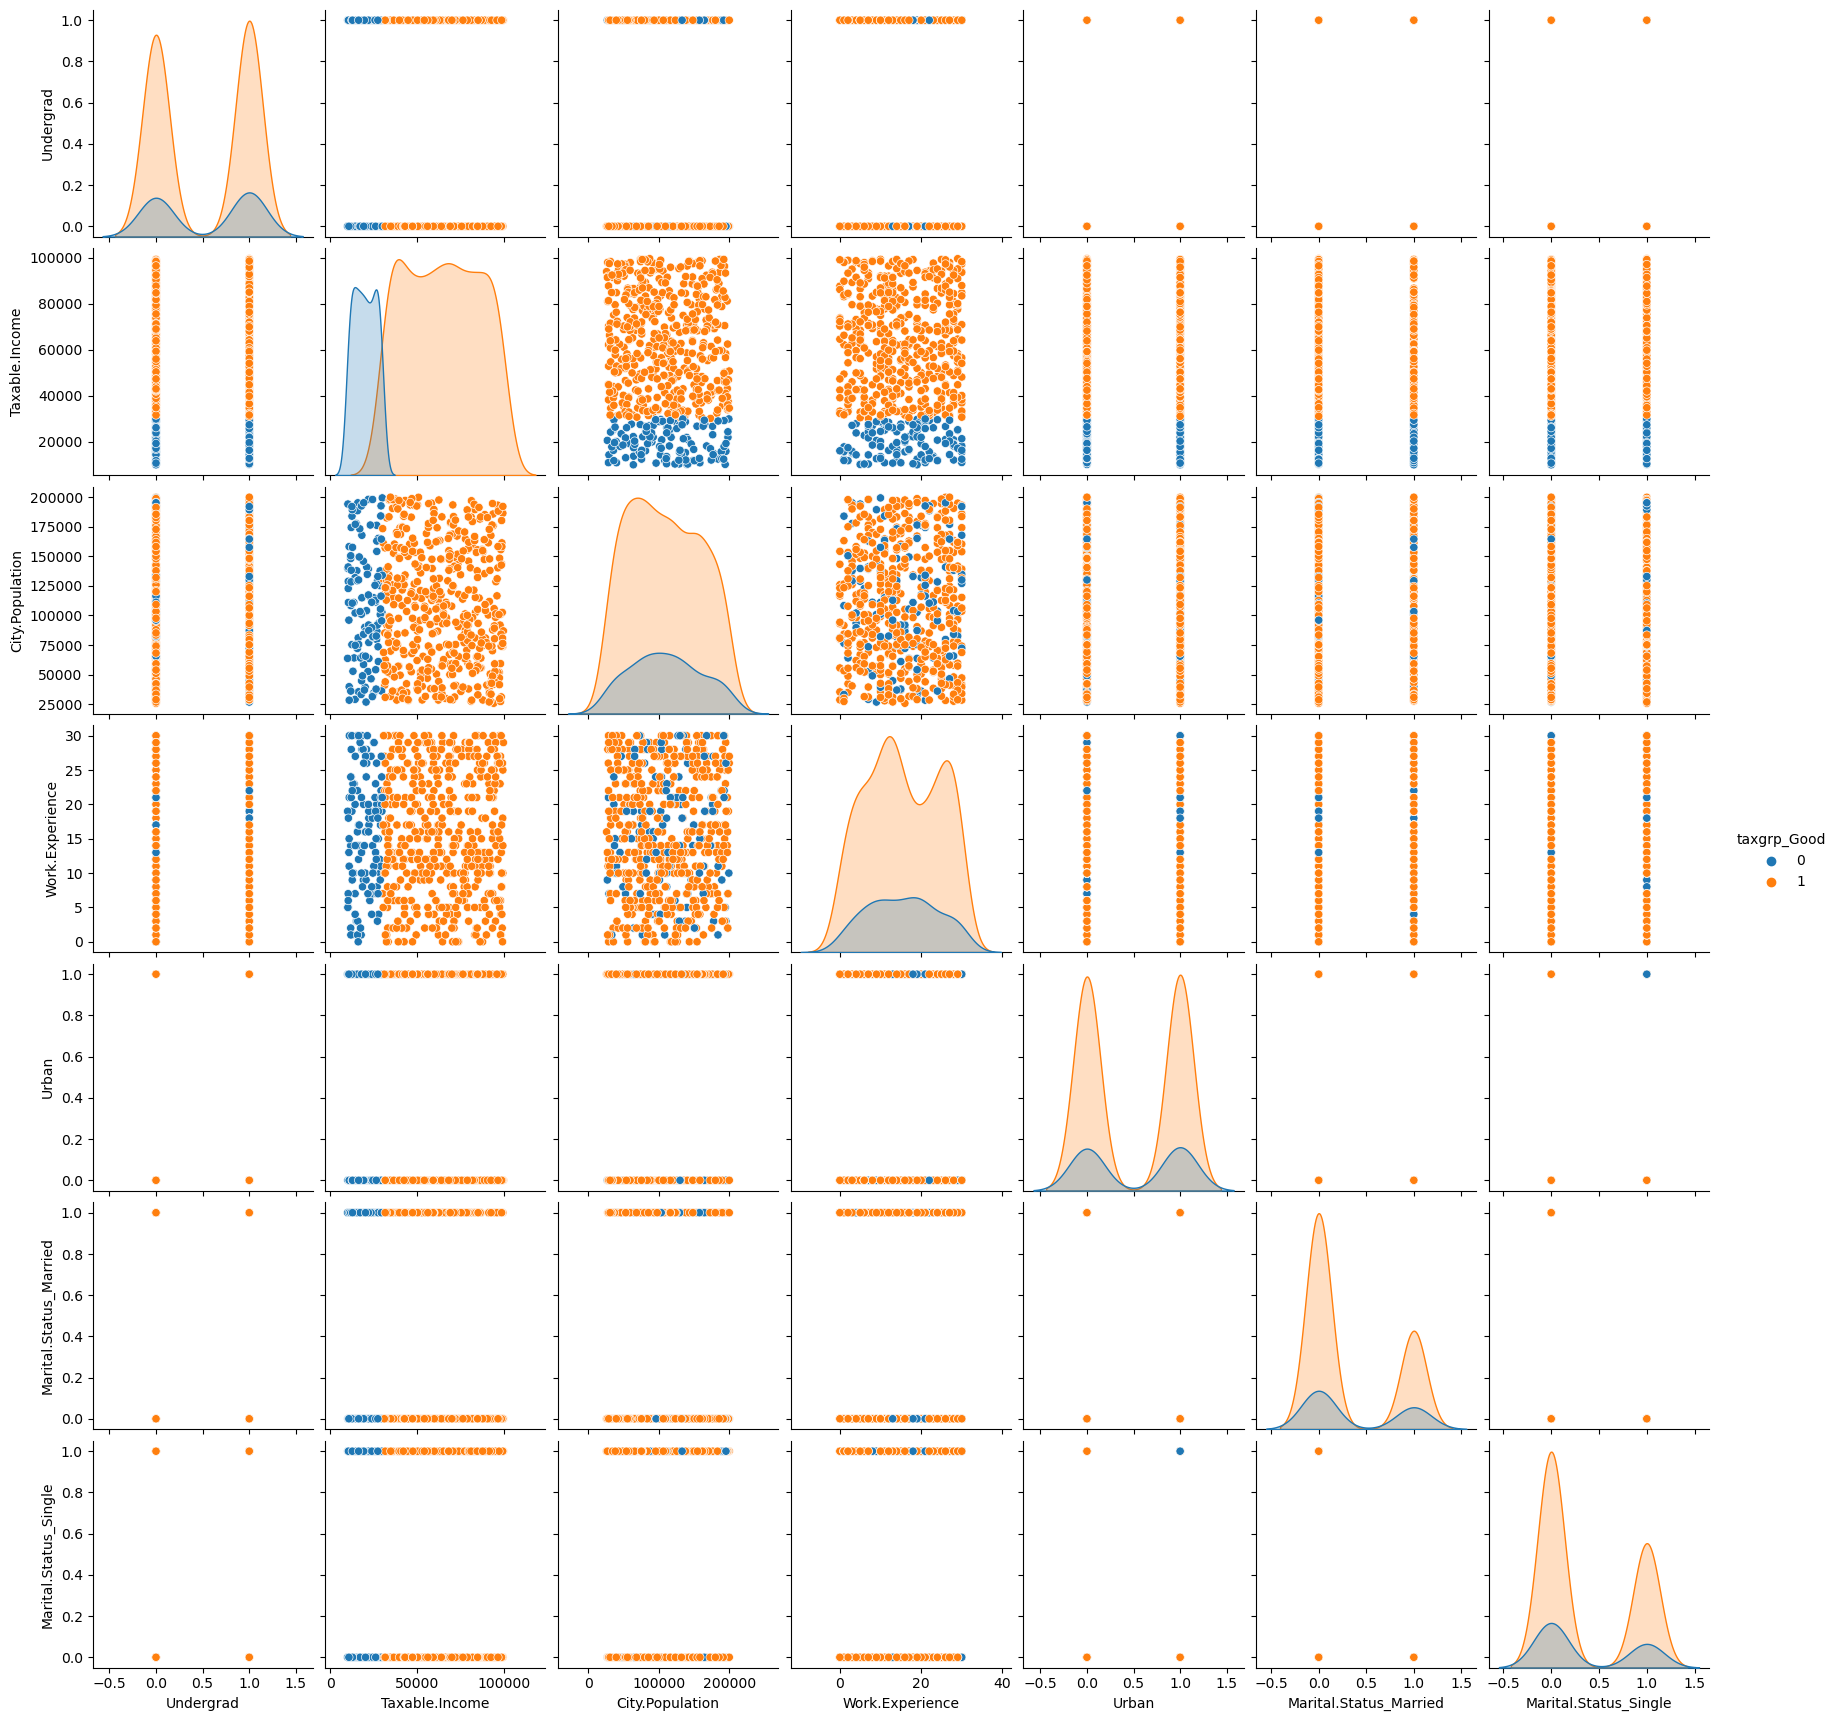

In [10]:
sns.pairplot(data=fd_data,hue='taxgrp_Good')
plt.show()

## Model Building

In [11]:
x=fd_data.drop('taxgrp_Good',axis=1)
y=fd_data[['taxgrp_Good']]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)

In [30]:
x_train.shape,y_train.shape

((480, 7), (480, 1))

In [31]:
x_test.shape,y_test.shape

((120, 7), (120, 1))

In [32]:
from sklearn.ensemble import  RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=rf,param_grid={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5,]},cv=5)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 2}


In [34]:
y_pred=rf.predict(x_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

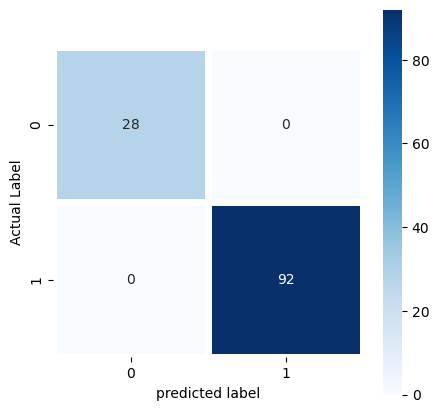

In [36]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('predicted label')
plt.show()

In [37]:
from sklearn import metrics 
accuracy_score=metrics.accuracy_score(y_pred,y_test)
print("Accuracy score",accuracy_score)

Accuracy score 1.0


## plot the tree

In [38]:
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

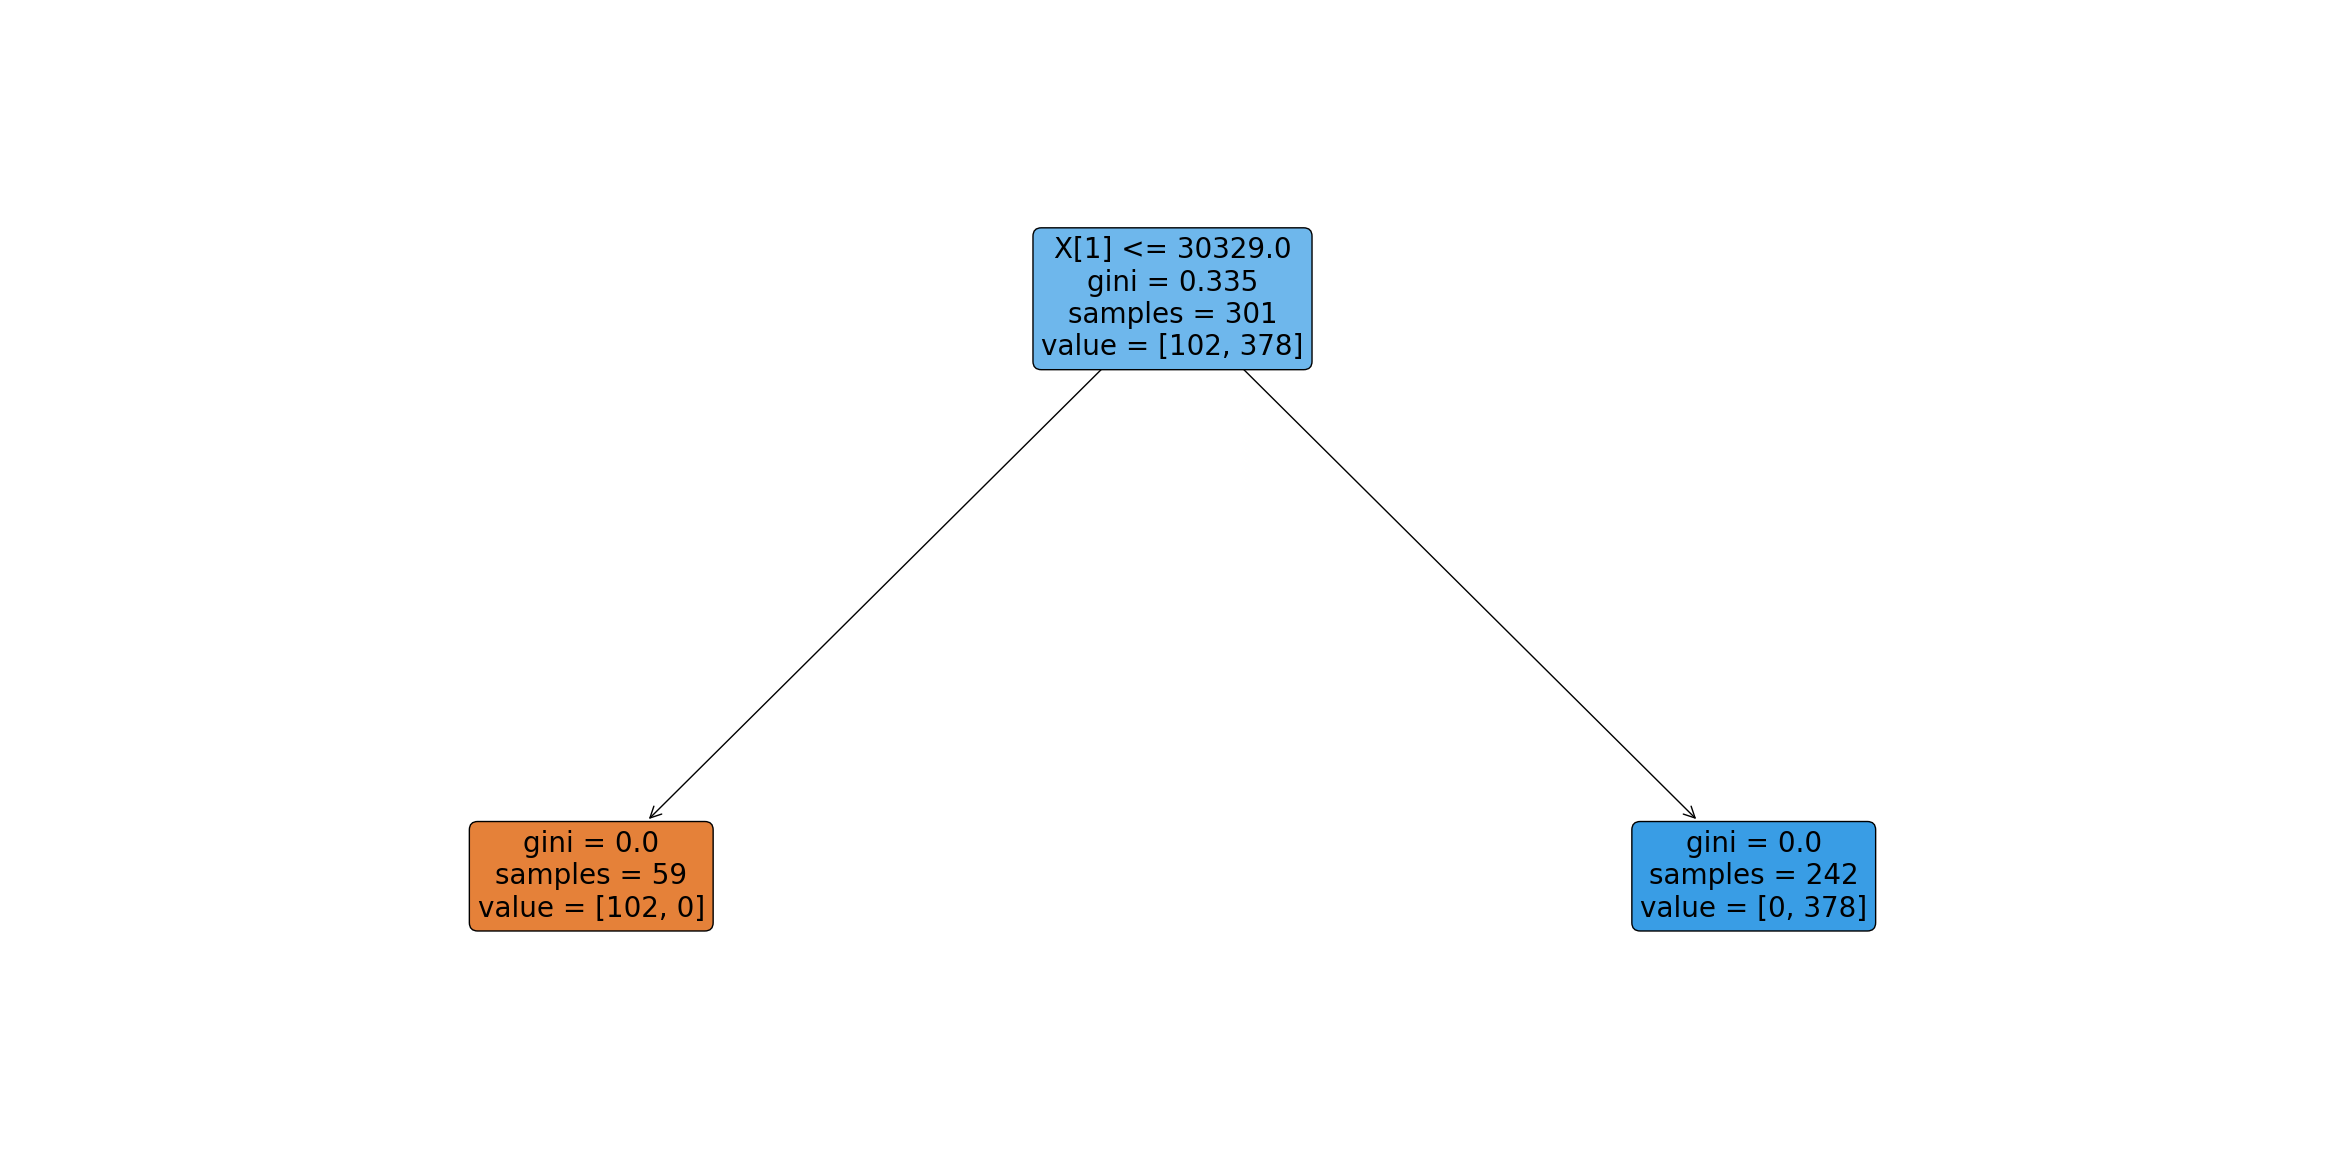

In [39]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(rf.estimators_[15],filled=True,rounded=True,max_depth=3,impurity='entropy',fontsize=20)
plt.show()